# Business Summary
As we know, the Coronavirus (Covid-19) started at early 2020 and is infecting hundreds of milion people in the world making it a pandemic. Among these people, many recovered from the infection while some of them died. 

Many variants of the virus appeared later in 2020 identified by Greek letters. 

While the COVID-19 is continuing to propagate around the world, safety measures have been enforced in many countries in order to reduce the propagation between infected people and non-infected people. However, scientifics developed vaccines to protect people and reduce the risk of hospitalization and death.

Some countries applied safety measures like social distancing, partial closing of non-essential services or stores, limitation of people in stores, wearing a mask mainly in close spaces, desinfection of hands, curfew and other measures that can be strict.


The objective is to understand how the Covid-19 in countries. 

# Datasets Gathering
The objective is to gather information on:
- Population in every country;
- Number of people that have been infected by the Covid-19 (or that are infected) in every country;
- Number of people dead of the Covid-19 in every country;
- Vaccination against Covid-19 of people in countries;
- Hospitalizations and intensive care (ICU) due to Covid-19 in countries.

The source of data used comes from https://github.com/owid/covid-19-data.

In [1]:
# Mount your Google Drive repository and select the folder to work in.
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab\ Notebooks/Covid19
PATH = "/content/drive/MyDrive/Colab\ Notebooks/Covid19"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Covid19


In [2]:
# Import of the main libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import display, clear_output
from tabulate import tabulate

# Import *.py files
import Utils
import DatasetDownloader
import Printer
import VaccinationsPrinter
import CasesDeathsPreparator
import CasesAndDeathsPrinter

# Import ipywidgets for having a UI to select a items from a dropdown list.
Utils.installPackageIfNotInstalled("ipywidgets")
import ipywidgets as widgets

## Population
The source of the dataset and features description are given here: https://github.com/owid/covid-19-data/tree/master/scripts/input/un.

In [3]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/scripts/input/un/population_latest.csv"
population = DatasetDownloader.downloadPopulationDataset(url)
#https://raw.githubusercontent.com/owid/covid-19-data/master/scripts/input/un/median_age.csv
#https://github.com/owid/covid-19-data/blob/master/scripts/input/owid/life_expectancy.csv

## Vaccinations
The source of the dataset and features description are given here: https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations.

In [4]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
vaccination = DatasetDownloader.downloadVaccinationsDataset(url)

url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv"
vaccinations_by_manufacturer = DatasetDownloader.downloadVaccinationsByManufacturerDataset(url)

url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-age-group.csv"
vaccinations_by_age_group = DatasetDownloader.downloadVaccinationsByAgeGroupDataset(url)

## Confirmed Cases and Deaths
The source of the dataset and features description are given here: https://github.com/owid/covid-19-data/tree/master/scripts/input/jhu. 

In [5]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/scripts/input/jhu/time_series_covid19_confirmed_global.csv"
cases = DatasetDownloader.downloadCasesDataset(url)

url = "https://raw.githubusercontent.com/owid/covid-19-data/master/scripts/input/jhu/time_series_covid19_deaths_global.csv"
deaths = DatasetDownloader.downloadDeathsDataset(url)

cases_deaths = CasesDeathsPreparator.mergeCasesAndDeathsDatasets(cases, deaths)

## Hospitalizations
The source of the dataset and features description are given here: https://github.com/owid/covid-19-data/tree/master/public/data/hospitalizations.

In [6]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/hospitalizations/covid-hospitalizations.csv"
hospitalizations = DatasetDownloader.downloadHospitalizationsDataset(url)

# Dashboards

## Summary
The objective is to display dynamically a dashboard based on a region (could be a country or the world) selected in a dropdown list. The dashboard presents:
- The cumulative number of cases and death;
- The new daily cases and deaths;
- The percentages of people not vaccinated, with only the first dose, with first and second doses, and with all 3 doses;
- The number of people vaccinated with at least one dose, at least 2 doses and all 3 doses;
- The cumulative total number of vaccins administrated;
- The new daily number of vaccins administrated;
- The cumulative number of people vaccinated with at least one dose, at least 2 doses and all 3 doses;
- The new daily number of first dose administrated;
- The new daily number of people hospitalized and intensive care (ICU);
- The number of people hospitalized per million people;
- The number of vaccins administrated per manufacturer (e.g. Moderna, Pfizer);
- The number of vaccins (first, second and third doses) administrated per age group (e.g. 0-17 years old, 18-25 years old).


Dropdown(description='Region', index=32, options=('(Select a region)', 'World', 'Afghanistan', 'Albania', 'Alg…

Canada Confirmed Cases and Deaths Summary

Total Cases    Total Deaths    Population    % of Cases Over Pop.    % of Deaths Over Pop.    % of Deaths over Cases    New Cases    New Deaths
-------------  --------------  ------------  ----------------------  -----------------------  ------------------------  -----------  ------------
3055581.0      33870.0         38067913.0    8.0267                  0.089                    1.1085                    21757.0      148.0



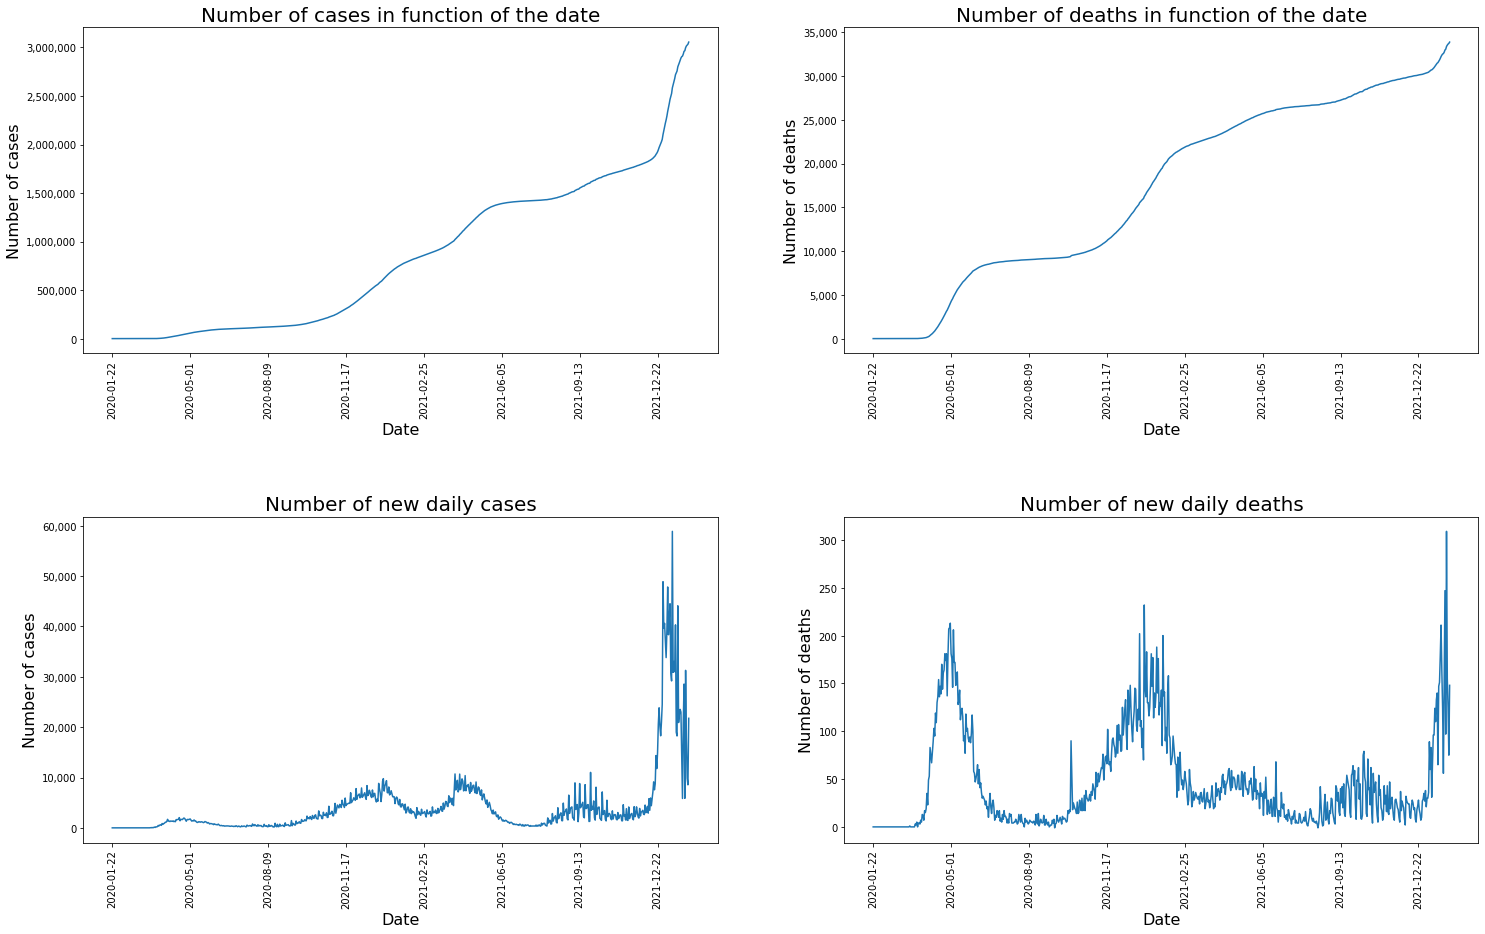

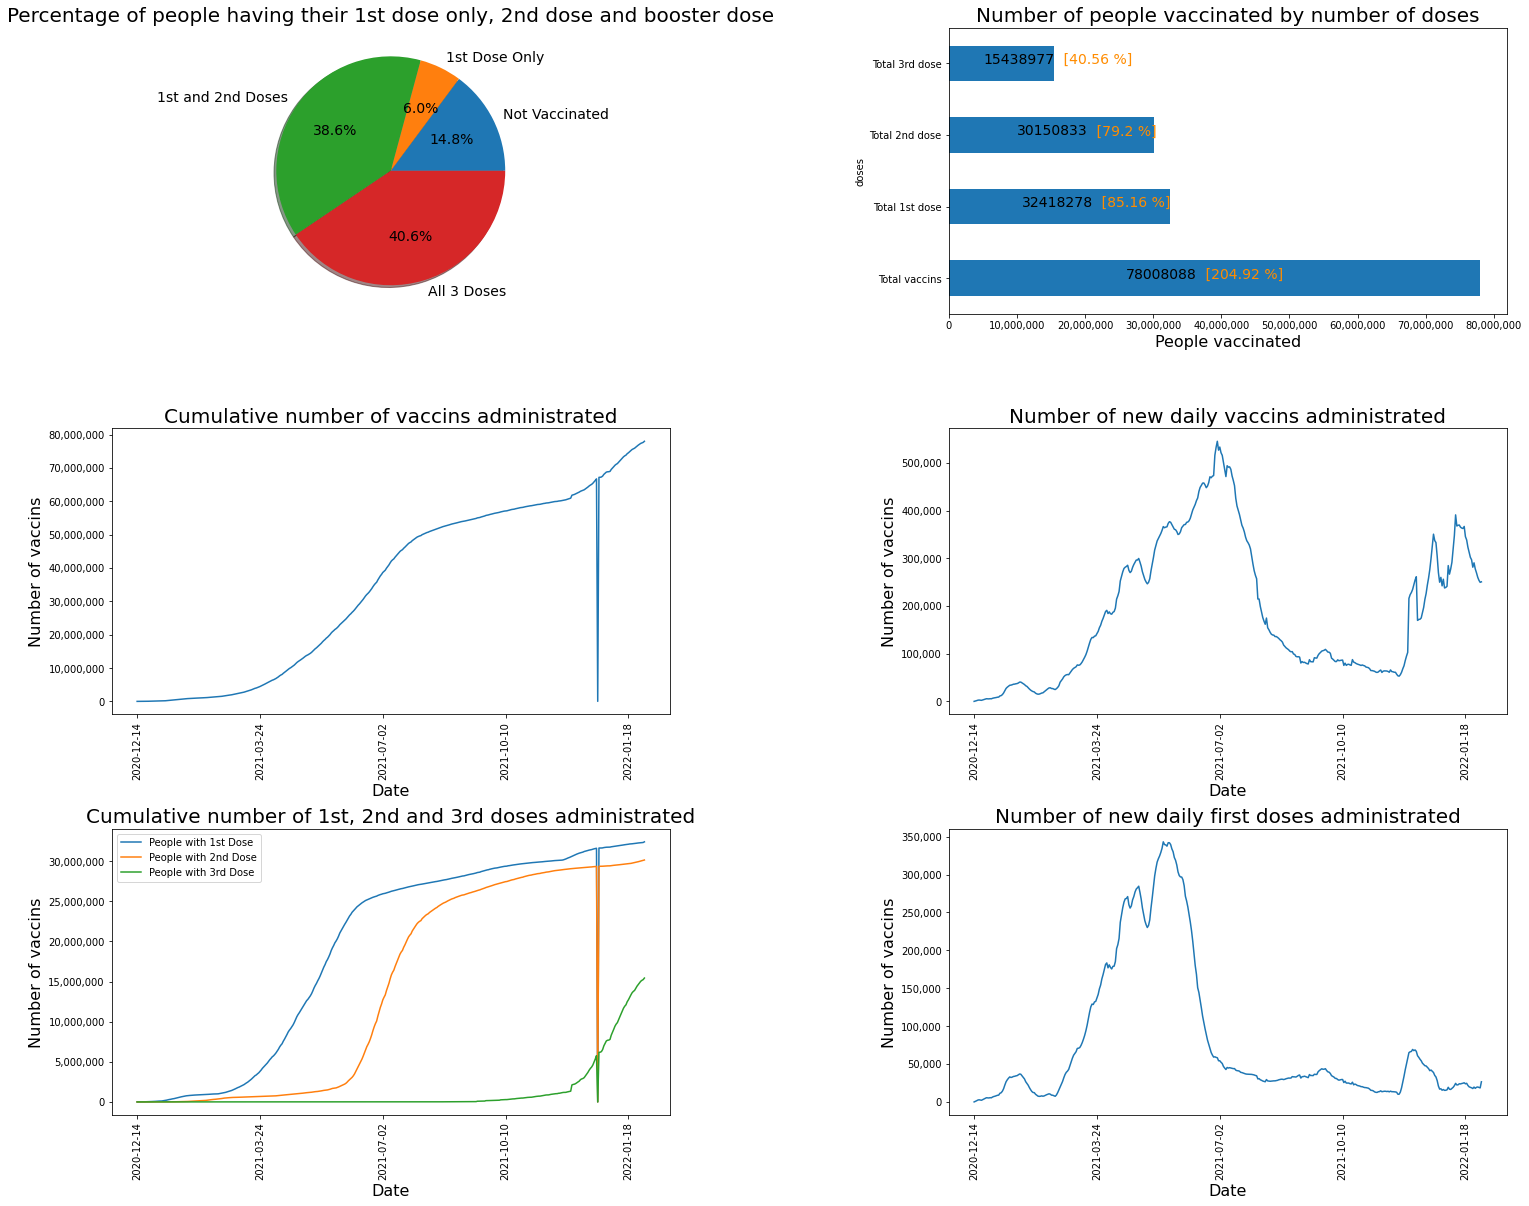

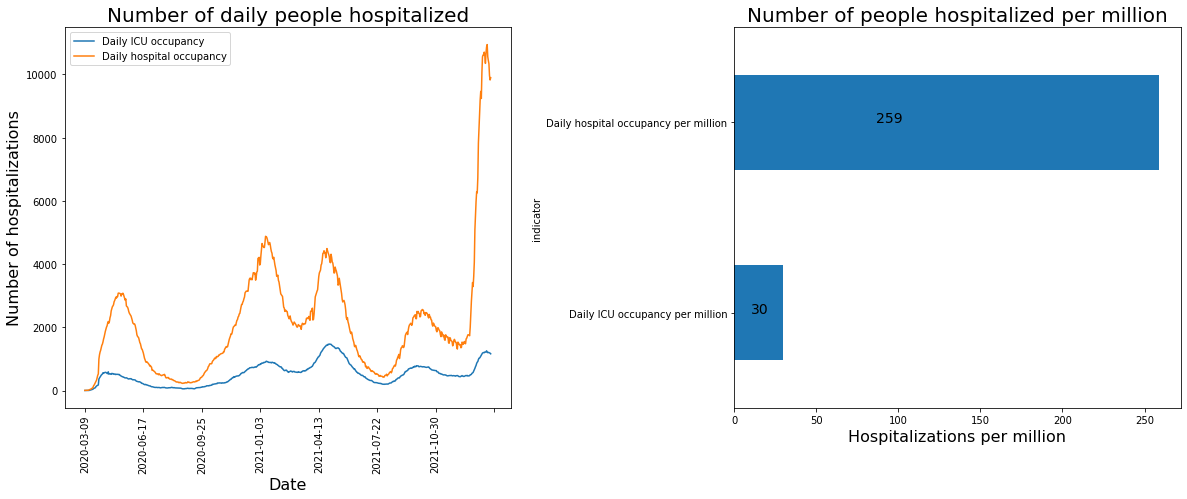

In [7]:
def onChangeRegion(change):
    if change['new'] != change['old']:
        clear_output()
        display(dropdown_regions)

        if change['new'] != "(Select a region)":
            # Cases and deaths summaries and charts for the world or a specific country.
            if change['new'] == "World":
                CasesAndDeathsPrinter.displayWorldSummary(cases_deaths, population)
            else:
                CasesAndDeathsPrinter.displayRegionSummary(cases_deaths, population, change['new'])

            # Vaccination summary and charts for the world or a specific country if it exists.
            if change['new'] in set(vaccination['entity']):
                Printer.plotVaccinationsByRegion(vaccination, change['new'])

            if change['new'] in set(hospitalizations['entity']):
                Printer.plotHospitalizationsByRegion(hospitalizations, change['new'])

            if change['new'] in set(vaccinations_by_manufacturer['entity']):
                Printer.plotVaccinationsByManufacturerByRegion(vaccinations_by_manufacturer, change['new'])

            if change['new'] in set(vaccinations_by_age_group['entity']):
                weekly_vaccinations_age_group = vaccinations_by_age_group.loc[vaccinations_by_age_group['entity'] == change['new'], vaccinations_by_age_group.columns != 'entity']
                VaccinationsPrinter.plotAgeGroupVaccinationsBarChart(weekly_vaccinations_age_group)


options = sorted(set(cases_deaths['entity']))
options.insert(0, "(Select a region)")
options.insert(1, "World")
dropdown_regions = widgets.Dropdown(options=options,
                                    value=options[0],
                                    description="Region")
display(dropdown_regions)

# Observer on the onChange event of the dropdown list.
dropdown_regions.observe(onChangeRegion, names='value')

## Countries with Greatest and Lowest Cases and Deaths

In [10]:
# Event OnChange of the dropdown list.
def onChangeSort(change):
    if change['new'] != change['old']:
        clear_output()
        display(dropdown_sort)

        if change['new'] != "(Select a way to sort)":
            daily_cases = CasesDeathsPreparator.prepareRegionsDailyCasesAndDeathsDataset(cases_deaths)
            region_cases = CasesDeathsPreparator.prepareTotalCasesAndDeathsByRegion(daily_cases, population)
            region_cases_sorted = region_cases.sort_values(by=change['new'], ascending=False, ignore_index=True)
            region_cases_sorted.index = region_cases_sorted.index + 1
            display(region_cases_sorted)

options = ['(Select a way to sort)', 'Total cases', 'Total deaths', '% of cases over population', '% of deaths over population', '% of deaths over cases']
dropdown_sort = widgets.Dropdown(options=options,
                                 value=options[0],
                                 description="Sort by")
display(dropdown_sort)

# Observer on the onChange event of the dropdown list.
dropdown_sort.observe(onChangeSort, names='value')

Dropdown(description='Sort by', index=1, options=('(Select a way to sort)', 'Total cases', 'Total deaths', '% …

,entity,Total cases,Total deaths,population,% of cases over population,% of deaths over population,% of deaths over cases
1,United States,74941202,886682,332915074,22.5106,0.2663,1.1832
2,India,41469499,496242,1393409033,2.9761,0.0356,1.1966
3,Brazil,25463530,627589,213993441,11.8992,0.2933,2.4647
4,France,19266496,131937,67422000,28.5760,0.1957,0.6848
5,United Kingdom,17431225,156281,68207114,25.5563,0.2291,0.8966
...,...,...,...,...,...,...,...
188,Samoa,32,0,200144,0.0160,0.0000,0.0000
189,Marshall Islands,7,0,59618,0.0117,0.0000,0.0000
190,Vanuatu,7,1,314464,0.0022,0.0003,14.2857
191,Tonga,1,0,106759,0.0009,0.0000,0.0000
